In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

from pandas.plotting import scatter_matrix

# Kaggle Titanic

This is my solution for the Titanic challenge on Kaggle.

In [2]:
import os
from pathlib import Path
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\gender_submission.csv
data\test.csv
data\train.csv


* gender_submission: sample submission
* test: test data, this is used for the contest --> we won't be  using this file until the very end, short before we submit the data
* train: training data, used for training

# Analyze the data

In [3]:
def load_titanic_data():
    return pd.read_csv(os.path.join('data', 'train.csv'))

titanic = load_titanic_data()

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analyze the data

### Ticket column

In [6]:
titanic["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [7]:
print("Number of unique values ion the ticket col: ", titanic["Ticket"].nunique())

Number of unique values ion the ticket col:  681


In [8]:
titanic["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [9]:
print("Null values:")
titanic["Ticket"].isna().sum()

Null values:


0

Since we have 681 different values (and only 891 data points, no occurrence is more than 7), we will not take this column into account

### Cabin column

In [10]:
print("Number of unique values: ", titanic["Cabin"].nunique())
print("Number of null values: ", titanic["Cabin"].isna().sum())
print("Number of not null values: ", titanic["Cabin"].count())

Number of unique values:  147
Number of null values:  687
Number of not null values:  204


In [11]:
print("% of null values: ", titanic["Cabin"].isna().sum() / titanic["Cabin"].size)

% of null values:  0.7710437710437711


Since we have 77% of null values in that column, we will not take it into account

### All numerical attributes

In [12]:
titanic.describe() # ignores null values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Plot the data

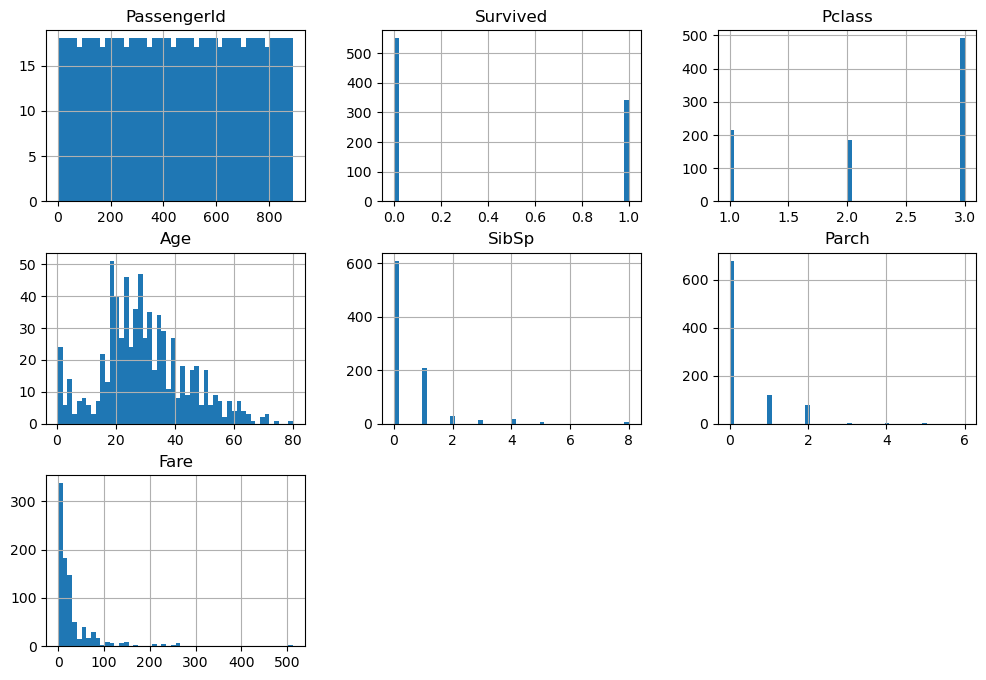

In [13]:
titanic.hist(bins=50, figsize=(12, 8))
plt.show()

### Dropping columns

We are going to work with those columns:
* PassengerId
* Survived (our label)
* Pclass
* Sex
* Age
* SibSp
* Parch
* Fare
* Embarked

We are dropping those columns:
* Name (the name does not depend on whether the person has survived or not)
* Ticket (too many different values)
* Cabin (too many null values)

In [14]:
titanic = titanic.drop(["Name", "Ticket", "Cabin"], axis=1)

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Splitting training and test data

We try to do "stratified" sampling here: that means we divide the data into homogenous subgroups ("strata") based on specific characteristics, and then we take the right number of instances from each stratum. So we have the same proportion of the characteristic in the training and the test data.

We do this with the attribute "Pclass".

In [16]:
titanic_train_set, titanic_test_set = train_test_split(titanic, test_size=0.2, stratify=titanic["Pclass"], random_state=42)

Let's check how the classes are divided in the full dataset, the test set and the training set:

In [17]:
print(titanic["Pclass"].value_counts() / titanic["Pclass"].size)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


In [18]:
titanic_train_set["Pclass"].value_counts() / titanic_train_set["Pclass"].size

3    0.550562
1    0.242978
2    0.206461
Name: Pclass, dtype: float64

In [19]:
titanic_test_set["Pclass"].value_counts() / titanic_test_set["Pclass"].size

3    0.553073
1    0.240223
2    0.206704
Name: Pclass, dtype: float64

Now we'll put the test set aside and just work on the training set.
For this we'll make a copy of the training set, the original set is always **titanic_train_set**

In [20]:
titanic = titanic_train_set.copy()

## Look for Correlations

In [21]:
corr_matrix = titanic.corr(numeric_only=True)

In [22]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.251609
Parch          0.059978
PassengerId    0.010203
SibSp         -0.060153
Age           -0.070720
Pclass        -0.334031
Name: Survived, dtype: float64

We see two things:
* positive correlation between Survived and Fare: the higher the Fare, the rather Survived = 1 (people who have paid more rather survived than people who have paid less)
* negative correlation between Survived and Pclass: the lower the Pclass, the rather Survived = 1 (people in class 1 rather survived than people in class 3)

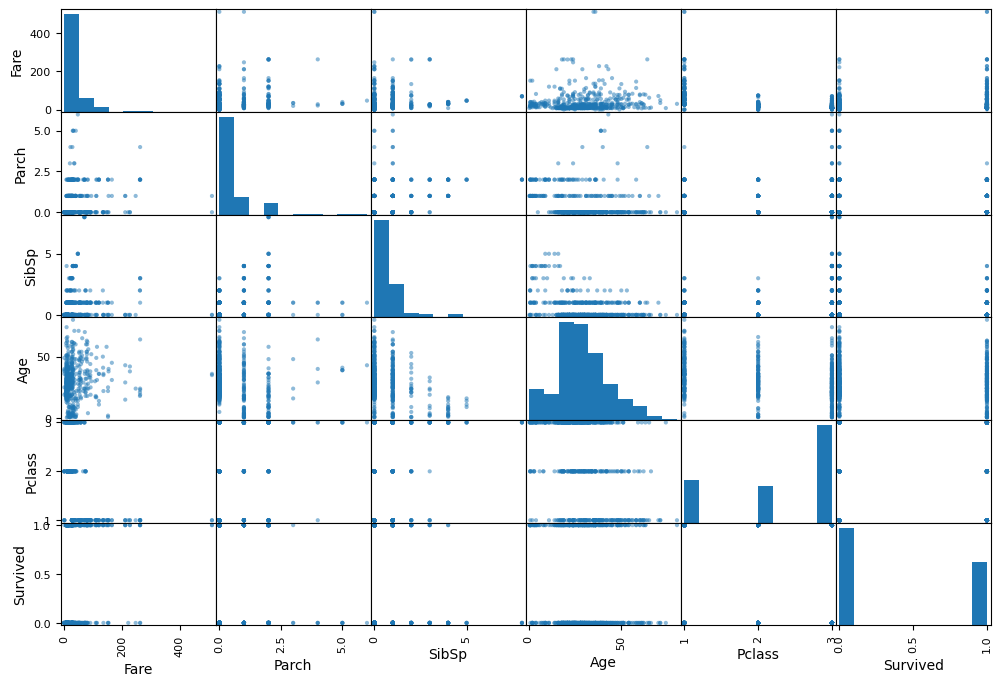

In [23]:
attributes_to_plot = ["Fare", "Parch", "SibSp", "Age", "Pclass", "Survived"]
scatter_matrix(titanic[attributes_to_plot], figsize=(12, 8))
plt.show()

We cannot gain a lot of insights here - let's look at only two variables.

<Axes: xlabel='Age', ylabel='Fare'>

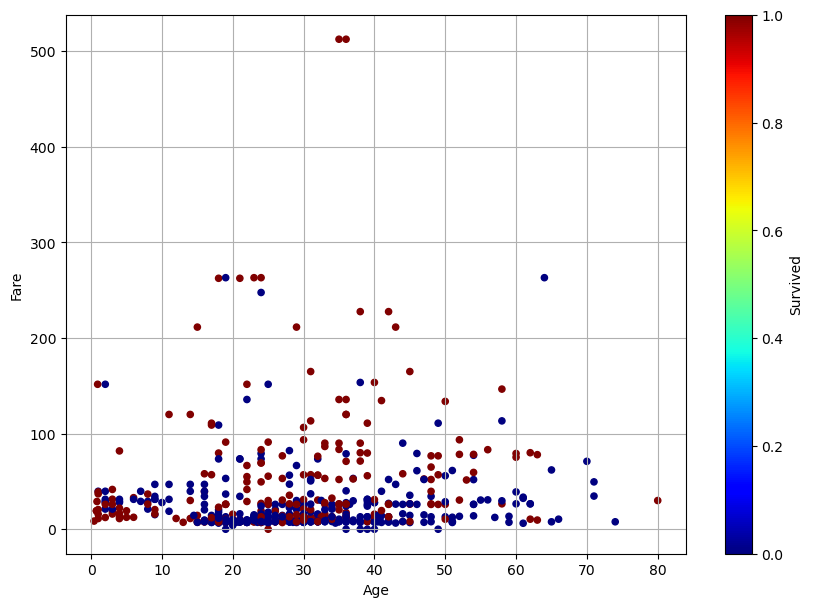

In [24]:
titanic.plot(kind="scatter", x="Age", y="Fare", c="Survived", cmap="jet", figsize=(10,7), grid=True)

## Clean the Data

Let's look for null values:

In [25]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            138
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

We can:
* get rid of the whole attribute (the column)
* get rid of the data (the row)
* set the missing value ("imputation")

Let's go with imputation. We'll set the missing Age to the median and the missing Embarked to the most values.

### Age

In [26]:
median_imputer = SimpleImputer(strategy="median")
titanic_num = titanic.select_dtypes(include=[np.number]) # median can only be calculated on numerical attributes, so Sex and Embarked are missing here
titanic_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          574 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [27]:
median_imputer.fit(titanic_num)
median_imputer.statistics_

array([435.5   ,   0.    ,   3.    ,  28.    ,   0.    ,   0.    ,
        14.4542])

In [28]:
X = median_imputer.transform(titanic_num) # replaces missing values with the median
titanic_tr = pd.DataFrame(X, columns=titanic_num.columns, index=titanic_num.index) # create a new DataFrame - there are now no missing Age values any more
titanic_tr.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

### Embarked

In [29]:
titanic["Embarked"].unique()

array(['S', 'Q', 'C', nan], dtype=object)

In [30]:
titanic_embarked = titanic[["Embarked"]]
titanic_embarked.head()

,Embarked
820,S
439,S
821,S
403,S
343,S


In [31]:
ordinal_encoder_embarked = OrdinalEncoder()
titanic_embarked_encoded = ordinal_encoder_embarked.fit_transform(titanic_embarked)
ordinal_encoder_embarked.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

In [32]:
embarked_df = pd.DataFrame(ordinal_encoder_embarked.transform(titanic_embarked), columns=ordinal_encoder_embarked.get_feature_names_out(), index=titanic_embarked.index)
embarked_df

,Embarked
820,2.0
439,2.0
821,2.0
403,2.0
343,2.0
...,...
13,2.0
789,0.0
51,2.0
625,2.0


Now we have numbers, but still null values

In [33]:
embarked_df["Embarked"].isna().sum()

2

In [34]:
most_frequent_imputer = SimpleImputer(strategy="most_frequent")
most_frequent_imputer.fit(embarked_df)
X = most_frequent_imputer.transform(embarked_df)
embarked_df = pd.DataFrame(X, columns=embarked_df.columns, index=embarked_df.index)

Now there are no null values any more:

In [35]:
embarked_df["Embarked"].isna().sum()

0

### Sex

We have no null values in this attribute, but we change it to categories as well

In [36]:
titanic_sex = titanic[["Sex"]]
ordinal_encoder_sex = OrdinalEncoder()
titanic_sex_encoded = ordinal_encoder_sex.fit_transform(titanic_sex)
sex_df = pd.DataFrame(ordinal_encoder_sex.transform(titanic_sex), columns=ordinal_encoder_sex.get_feature_names_out(), index=titanic_sex.index)
sex_df

,Sex
820,0.0
439,1.0
821,1.0
403,1.0
343,1.0
...,...
13,1.0
789,1.0
51,1.0
625,1.0


### Putting it all together

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          574 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [38]:
# we drop the columns we have worked on now
titanic = titanic.drop(["Age", "Sex", "Embarked"], axis=1)

In [39]:
titanic["Embarked"] = embarked_df
titanic["Sex"] = sex_df
titanic["Age"] = titanic_tr["Age"]

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   Embarked     712 non-null    float64
 7   Sex          712 non-null    float64
 8   Age          712 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 55.6 KB


In [41]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex            0
Age            0
dtype: int64

**Now we have only number values and no null values any more --> that's what we wanted to achieve**

# Feature Scaling and Transformation

Show a diagram for the age:

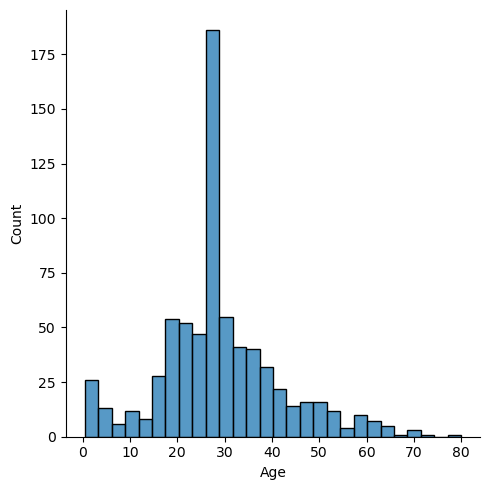

In [43]:
sns.displot(data=titanic["Age"])

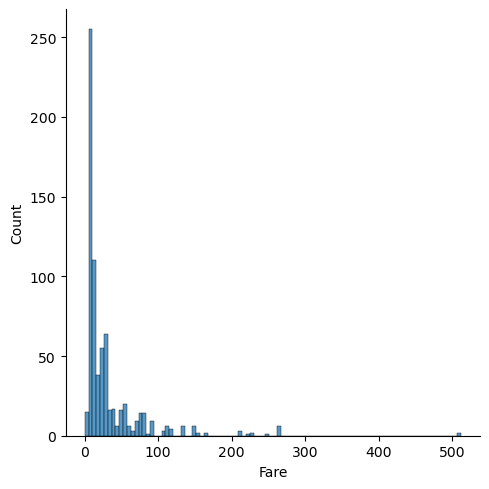

In [52]:
sns.displot(data=titanic["Fare"])

Let's standardize those two features

In [58]:
std_scaler = StandardScaler()
titanic_scaled = std_scaler.fit(titanic)

In [61]:
titanic_scaled_df = pd.DataFrame(std_scaler.fit_transform(titanic), columns=std_scaler.get_feature_names_out(), index=titanic.index)

In [62]:
titanic_scaled_df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex,Age
820,1.476747,1.242118,-1.564057,0.440644,0.759653,1.259243,0.609804,-1.359412,1.768064
439,0.000147,-0.805076,-0.367914,-0.490331,-0.478043,-0.447327,0.609804,0.735612,0.147312
821,1.480623,1.242118,0.828228,-0.490331,-0.478043,-0.485108,0.609804,0.735612,-0.161403
403,-0.139374,-0.805076,0.828228,0.440644,-0.478043,-0.337326,0.609804,0.735612,-0.084224
343,-0.371910,-0.805076,-0.367914,-0.490331,-0.478043,-0.395925,0.609804,0.735612,-0.315760


Everything is scaled now, but we just want Age and Fare

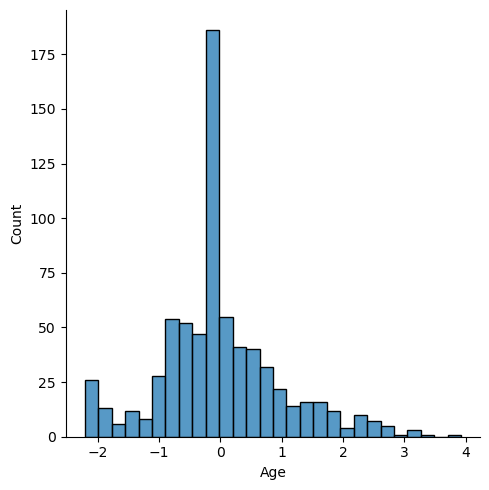

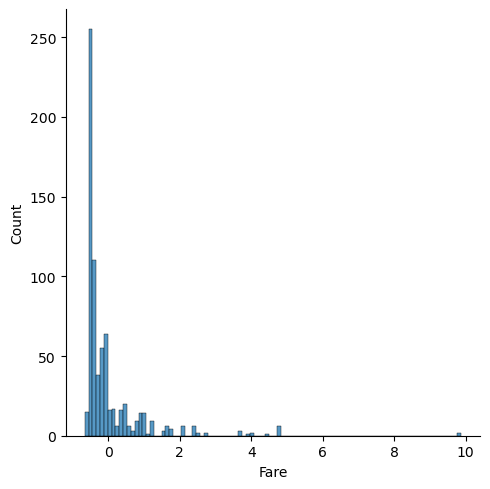

In [64]:
sns.displot(data=titanic_scaled_df["Age"])
sns.displot(data=titanic_scaled_df["Fare"])

In [65]:
titanic["Age"] = titanic_scaled_df["Age"]
titanic["Fare"] = titanic_scaled_df["Fare"]

In [66]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex,Age
820,821,1,1,1,1,1.259243,2.0,0.0,1.768064
439,440,0,2,0,0,-0.447327,2.0,1.0,0.147312
821,822,1,3,0,0,-0.485108,2.0,1.0,-0.161403
403,404,0,3,1,0,-0.337326,2.0,1.0,-0.084224
343,344,0,2,0,0,-0.395925,2.0,1.0,-0.315760


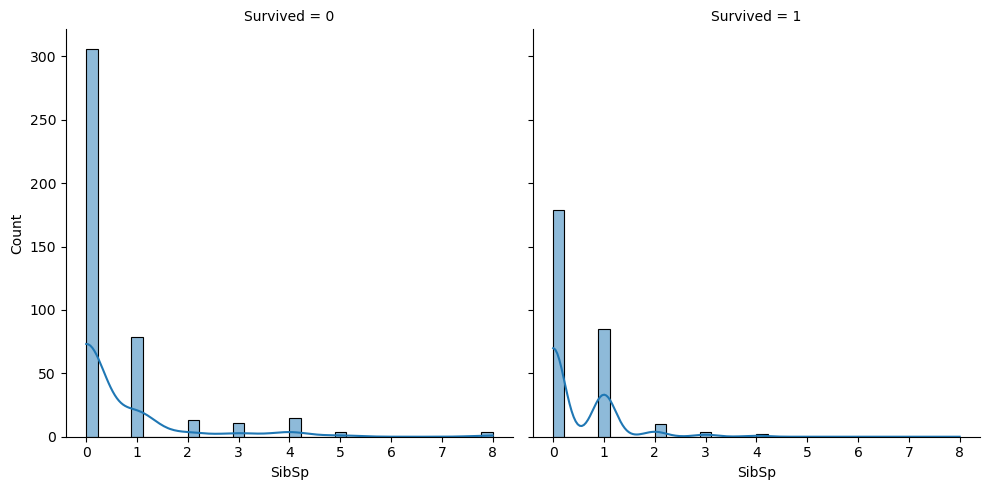

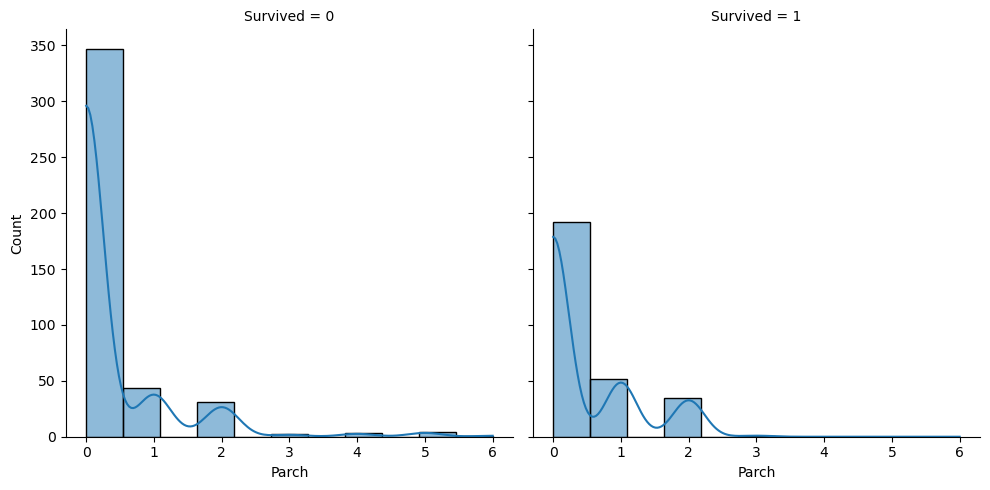

In [73]:
sns.displot(data=titanic, x='SibSp', col='Survived', kde=True)
sns.displot(data=titanic, x='Parch', col='Survived', kde=True)

Let's try something. Let's create a new attribute "alone". If SibSp == 0 and Parch == 0 the new column has "1" (alone = "yes"), otherwise it'll get "0" (alone = "no").

In [74]:
# Create a mask for the conditions
mask = (titanic["SibSp"] == 0) & (titanic["Parch"] == 0)

# Create a new column, initialized with 1
titanic["Alone"] = 1
titanic.loc[~mask, "Alone"] = 0 # set 0 where the condition is not met

In [75]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex,Age,Alone
820,821,1,1,1,1,1.259243,2.0,0.0,1.768064,0
439,440,0,2,0,0,-0.447327,2.0,1.0,0.147312,1
821,822,1,3,0,0,-0.485108,2.0,1.0,-0.161403,1
403,404,0,3,1,0,-0.337326,2.0,1.0,-0.084224,0
343,344,0,2,0,0,-0.395925,2.0,1.0,-0.315760,1


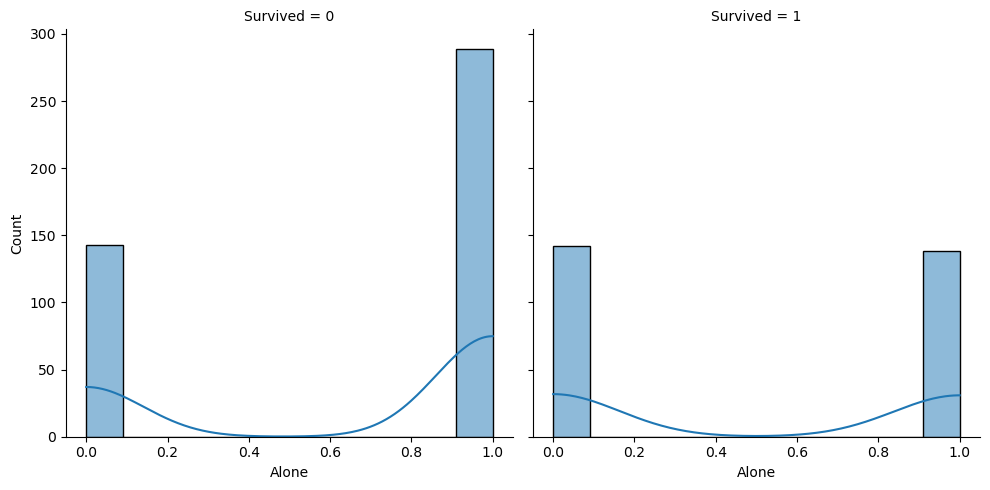

In [76]:
sns.displot(data=titanic, x='Alone', col='Survived', kde=True)

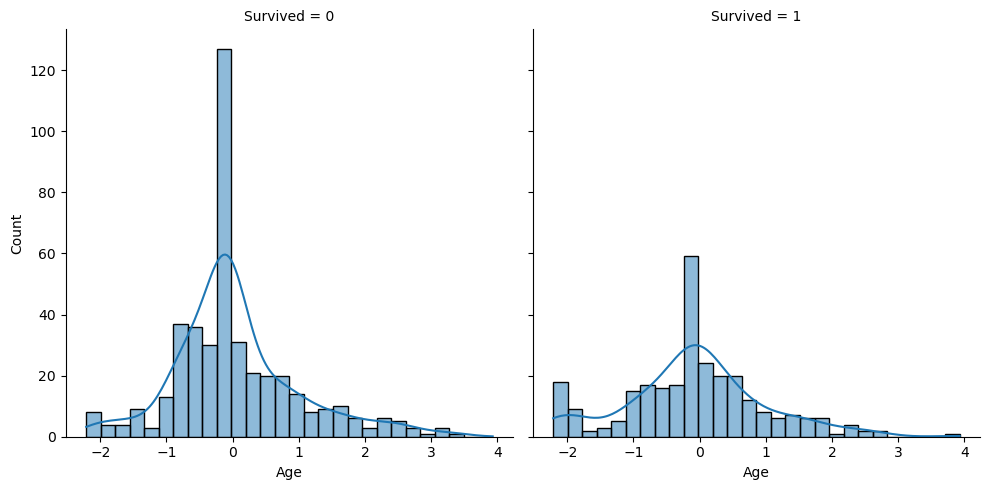

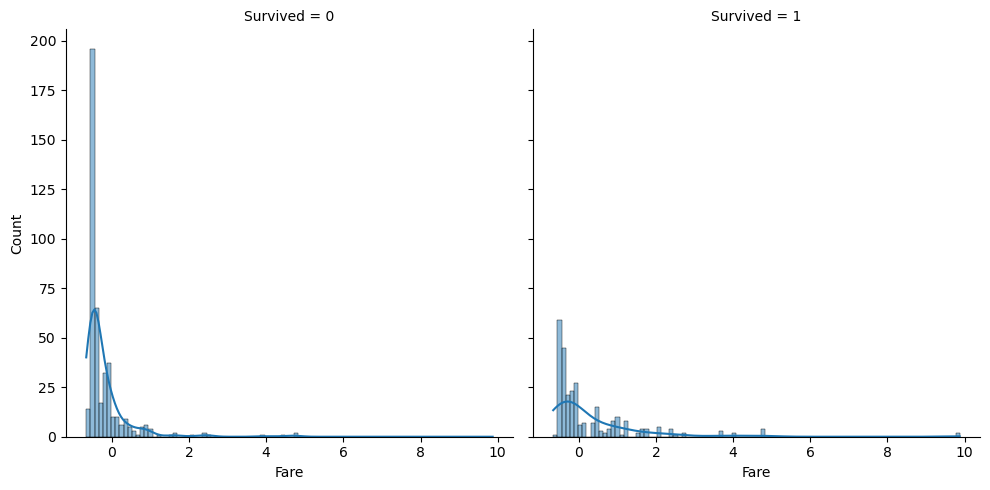

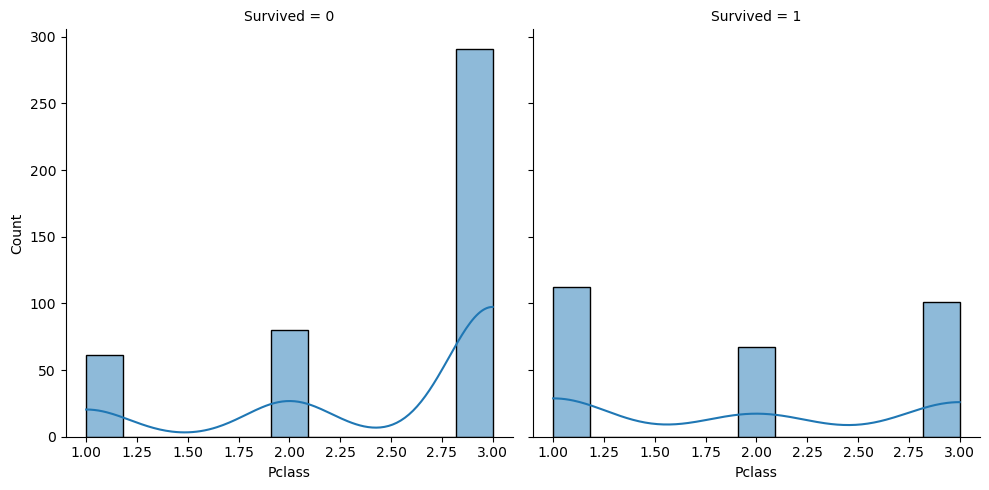

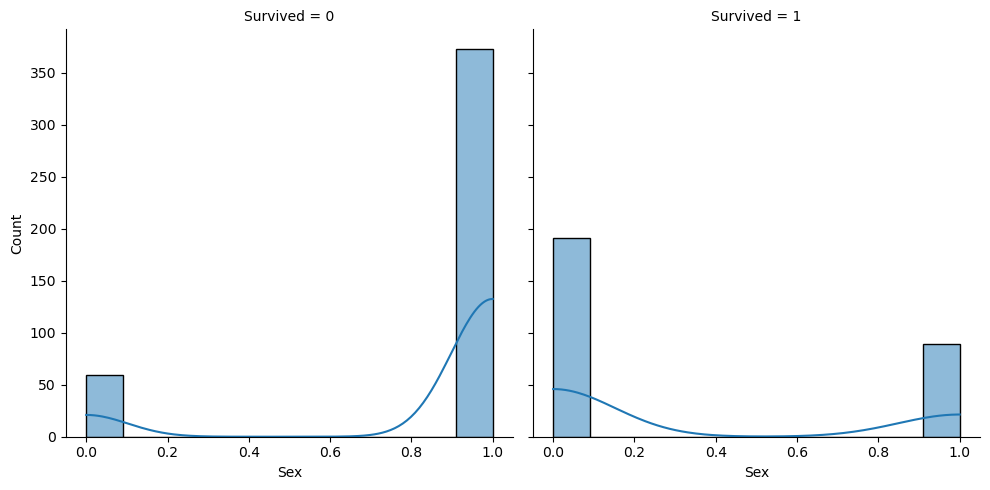

In [78]:
sns.displot(data=titanic, x='Age', col='Survived', kde=True)
sns.displot(data=titanic, x='Fare', col='Survived', kde=True)
sns.displot(data=titanic, x='Pclass', col='Survived', kde=True)
sns.displot(data=titanic, x='Sex', col='Survived', kde=True)

Ok based on our analysis, we'll take the following attributes into account:
* Sex
* Pclass
* Alone

And we'll drop the rest.

In [79]:
titanic = titanic.drop(["SibSp", "Parch", "Fare", "Embarked", "Age"], axis=1)

In [80]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Alone
820,821,1,1,0.0,0
439,440,0,2,1.0,1
821,822,1,3,1.0,1
403,404,0,3,1.0,0
343,344,0,2,1.0,1


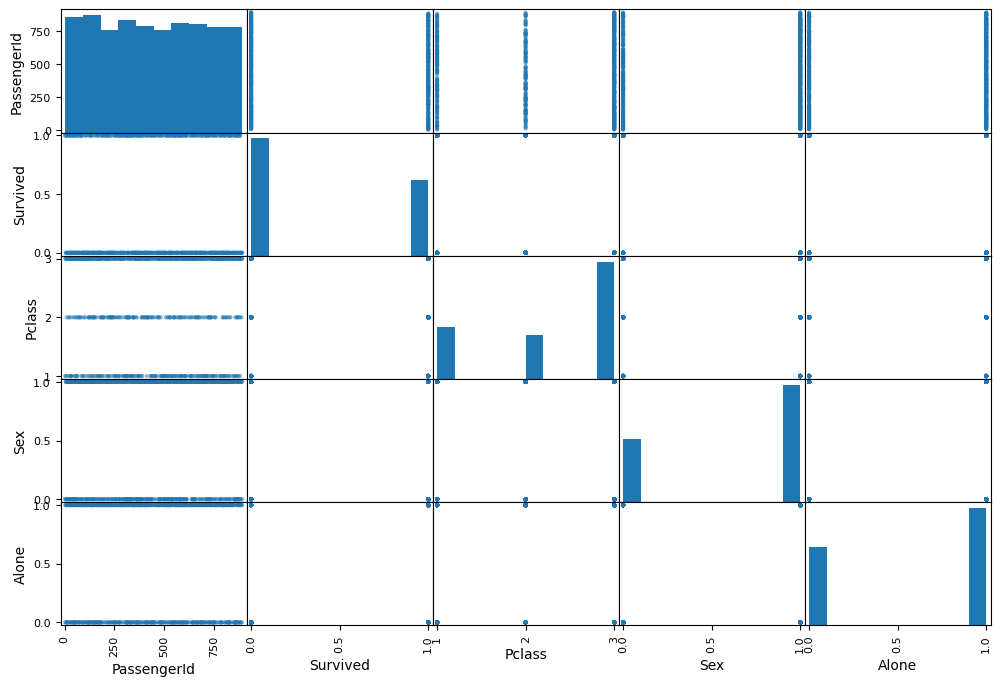

In [81]:
scatter_matrix(titanic, figsize=(12, 8))
plt.show()

## Pipelines

In [115]:
#TODO

## Train and Evaluate on the Training Set

### KNeighborsRegressor

In [116]:
knn_model = KNeighborsRegressor()
X = titanic.drop(["Survived"], axis=1)
y = titanic["Survived"]

In [117]:
knn_model.fit(X, y)

KNeighborsRegressor()

In [118]:
print("The score of our model is ", knn_model.score(X, y))

The score of our model is  0.22748941798941769


In [119]:
cv_results = cross_validate(knn_model, X, y, cv=5, verbose=5)
cv_results

[CV] END ......................................, score=-0.196 total time=   0.0s
[CV] END ......................................, score=-0.198 total time=   0.0s
[CV] END ......................................, score=-0.166 total time=   0.0s
[CV] END ......................................, score=-0.286 total time=   0.0s
[CV] END ......................................, score=-0.175 total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00201988, 0.00200367, 0.00102115, 0.00099516, 0.00200057]),
 'score_time': array([0.00101042, 0.00099158, 0.00200796, 0.00199986, 0.00099897]),
 'test_score': array([-0.19590968, -0.19798394, -0.16634188, -0.2858022 , -0.17496633])}

In [120]:
print("The score of our model is ", knn_model.score(X, y))

The score of our model is  0.22748941798941769


In [121]:
grid = GridSearchCV(estimator=KNeighborsRegressor(),
                   param_grid={"n_neighbors": range(1, 20)},
                   return_train_score=True)
grid.fit(X, y)
results = grid.cv_results_
results = pd.DataFrame(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001800,0.000399,0.001200,3.992082e-04,1,{'n_neighbors': 1},-0.955927,-0.665462,-0.850855,-1.071129,...,-0.897143,0.135343,19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001600,0.000490,0.001206,3.959781e-04,2,{'n_neighbors': 2},-0.490230,-0.320884,-0.501923,-0.574625,...,-0.459919,0.086573,18,0.549992,0.514594,0.565058,0.557517,0.554596,0.548351,0.017575
2,0.001411,0.000504,0.001589,4.920820e-04,3,{'n_neighbors': 3},-0.334998,-0.292169,-0.409212,-0.402819,...,-0.324905,0.082261,17,0.387033,0.356909,0.382716,0.412512,0.389020,0.385638,0.017717
3,0.001413,0.000492,0.001182,3.940494e-04,4,{'n_neighbors': 4},-0.249620,-0.171925,-0.261084,-0.331693,...,-0.237813,0.059689,16,0.274885,0.285786,0.271747,0.299402,0.248495,0.276063,0.016848
4,0.001800,0.000400,0.001201,4.001381e-04,5,{'n_neighbors': 5},-0.195910,-0.197984,-0.166342,-0.285802,...,-0.204201,0.042554,15,0.248796,0.226907,0.250585,0.247817,0.199666,0.234754,0.019551
5,0.001201,0.000400,0.001400,4.895123e-04,6,{'n_neighbors': 6},-0.205638,-0.158964,-0.158048,-0.261749,...,-0.183652,0.045446,14,0.204236,0.178432,0.212354,0.195938,0.155422,0.189277,0.020320
6,0.001599,0.000489,0.001206,4.106761e-04,7,{'n_neighbors': 7},-0.180399,-0.133358,-0.167853,-0.229823,...,-0.169269,0.035391,12,0.168472,0.143676,0.163981,0.149250,0.129317,0.150939,0.014147
7,0.001413,0.000491,0.001393,4.936087e-04,8,{'n_neighbors': 8},-0.187527,-0.116739,-0.203245,-0.255001,...,-0.183155,0.046667,13,0.127312,0.115222,0.120751,0.117368,0.105984,0.117327,0.006993
8,0.001600,0.000490,0.001200,4.002811e-04,9,{'n_neighbors': 9},-0.175933,-0.123070,-0.164229,-0.215427,...,-0.160696,0.034475,11,0.102817,0.104759,0.086257,0.095350,0.093125,0.096462,0.006719
9,0.001411,0.000481,0.001396,4.932917e-04,10,{'n_neighbors': 10},-0.128539,-0.130504,-0.149350,-0.182529,...,-0.139791,0.025058,10,0.085991,0.085880,0.080921,0.090539,0.082064,0.085079,0.003396


In [122]:
print(f"Best param: {grid.best_params_}, best score: {grid.best_score_}")

Best param: {'n_neighbors': 18}, best score: -0.06627831373753268


<Axes: xlabel='param_n_neighbors', ylabel='mean_train_score'>

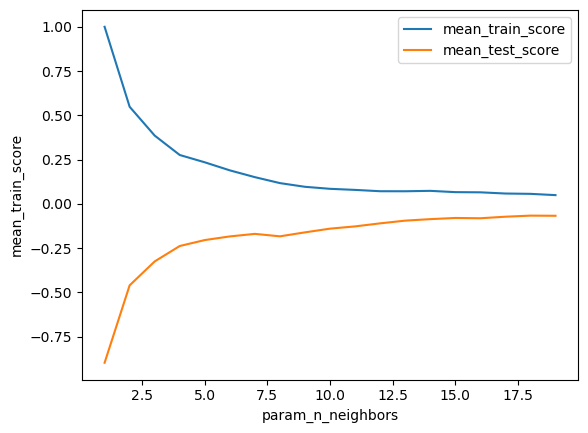

In [123]:
sns.lineplot(data=results, x="param_n_neighbors", y="mean_train_score", label="mean_train_score")
sns.lineplot(data=results, x="param_n_neighbors", y="mean_test_score", label="mean_test_score")

In [124]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

KNeighborsRegressor(n_neighbors=18)
{'n_neighbors': 18}
-0.06627831373753268


In [125]:
best_model = grid.best_estimator_
best_model.score(X, y)

0.05843723463322181

### DecisionTreeRegressor

In [126]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
dtr.score(X, y)

1.0

In [129]:
search_space = {
    'max_depth': [None, 1,2,3],
    'splitter': ["best", "random"],
    'min_samples_split': [2,3,4]
}   # these are possibilities how the DecisionTreeRegressor can be configured
grid = GridSearchCV(estimator=DecisionTreeRegressor(),
                    param_grid=search_space,
                    return_train_score=True,
                    )
grid.fit(X, y)
results = grid.cv_results_
results = pd.DataFrame(results)
print("Best estimator: ", grid.best_estimator_)
print("Score of best estimator: ", grid.best_estimator_.score(X, y))

Best estimator:  DecisionTreeRegressor(max_depth=3)
Score of best estimator:  0.4289746057148689


In [128]:
best_model = grid.best_estimator_